<a href="https://colab.research.google.com/github/MaferVelde/Telecom-X-parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X: Análisis de evasión de clientes (parte 2)**

# Preparar los datos para el modelado
  Tratamiento, codificación, normalización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Extracción del Archivo Tratado

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos

ID de cliente  Deserción     Genero  Adulto Mayor  Pareja  Dependientes  \
0       0002-ORFBO          0   Femenino             0       1             1   
1       0003-MKNFE          0  Masculino             0       0             0   
2       0004-TLHLJ          1  Masculino             0       0             0   
3       0011-IGKFF          1  Masculino             1       1             0   
4       0013-EXCHZ          1   Femenino             1       1             0   
...            ...        ...        ...           ...     ...           ...   
7027    9987-LUTYD          0   Femenino             0       0             0   
7028    9992-RRAMN          1  Masculino             0       1             0   
7029    9992-UJOEL          0  Masculino             0       0             0   
7030    9993-LHIEB          0  Masculino             0       1             1   
7031    9995-HOTOH          0  Masculino             0       1             1   

      Antigüedad  Servicio telefónico  Lineas multiples Servicio de internet  \
0              9                    1                 0                  DSL   
1              9                    1                 1                  DSL   
2              4                    1                 0          Fiber optic   
3             13                    1                 0          Fiber optic   
4              3                    1                 0          Fiber optic   
...          ...                  ...               ...                  ...   
7027          13                    1                 0                  DSL   
7028          22                    1                 1          Fiber optic   
7029           2                    1                 0                  DSL   
7030          67                    1                 0                  DSL   
7031          63                    0  No phone service                  DSL   

      ... Protección de dispositivo Soporte técnico TV streaming  \
0     ...                         0               1            1   
1     ...                         0               0            0   
2     ...                         1               0            0   
3     ...                         1               0            1   
4     ...                         0               1            1   
...   ...                       ...             ...          ...   
7027  ...                         0               1            0   
7028  ...                         0               0            0   
7029  ...                         0               0            0   
7030  ...                         1               1            0   
7031  ...                         1               0            1   

     Streaming de películas Contrato Facturación sin papel  \
0                         0    1 Año                     1   
1                         1  Mensual                     0   
2                         0  Mensual                     1   
3                         1  Mensual                     1   
4                         0  Mensual                     1   
...                     ...      ...                   ...   
7027                      0    1 Año                     0   
7028                      1  Mensual                     1   
7029                      0  Mensual                     1   
7030                      1   2 Años                     0   
7031                      1   2 Años                     0   

          Metodo de Pago  Cargo diario Cargo mensual  Cargo total  
0      Cheque por Correo      2.186667         65.60       593.30  
1      Cheque por Correo      1.996667         59.90       542.40  
2     Cheque Electrónico      2.463333         73.90       280.85  
3     Cheque Electrónico      3.266667         98.00      1237.85  
4      Cheque por Correo      2.796667         83.90       267.40  
...                  ...           ...           ...          ...  
7027   Cheque por Correo      1.838333       

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID de cliente              7032 non-null   object 
 1   Deserción                  7032 non-null   int64  
 2   Genero                     7032 non-null   object 
 3   Adulto Mayor               7032 non-null   int64  
 4   Pareja                     7032 non-null   int64  
 5   Dependientes               7032 non-null   int64  
 6   Antigüedad                 7032 non-null   int64  
 7   Servicio telefónico        7032 non-null   int64  
 8   Lineas multiples           7032 non-null   object 
 9   Servicio de internet       7032 non-null   object 
 10  Seguridad online           7032 non-null   object 
 11  Respaldo online            7032 non-null   object 
 12  Protección de dispositivo  7032 non-null   object 
 13  Soporte técnico            7032 non-null   objec

In [4]:
datos.describe()

Deserción  Adulto Mayor       Pareja  Dependientes   Antigüedad  \
count  7032.000000   7032.000000  7032.000000   7032.000000  7032.000000   
mean      0.265785      0.162400     0.482509      0.298493    32.421786   
std       0.441782      0.368844     0.499729      0.457629    24.545260   
min       0.000000      0.000000     0.000000      0.000000     1.000000   
25%       0.000000      0.000000     0.000000      0.000000     9.000000   
50%       0.000000      0.000000     0.000000      0.000000    29.000000   
75%       1.000000      0.000000     1.000000      1.000000    55.000000   
max       1.000000      1.000000     1.000000      1.000000    72.000000   

       Servicio telefónico  Facturación sin papel  Cargo diario  \
count          7032.000000            7032.000000   7032.000000   
mean              0.903299               0.592719      2.159940   
std               0.295571               0.491363      1.002866   
min               0.000000               0.000000      0.608333   
25%               1.000000               0.000000      1.186250   
50%               1.000000               1.000000      2.345000   
75%               1.000000               1.000000      2.995417   
max               1.000000               1.000000      3.958333   

       Cargo mensual  Cargo total  
count    7032.000000  7032.000000  
mean       64.798208  2283.300441  
std        30.085974  2266.771362  
min        18.250000    18.800000  
25%        35.587500   401.450000  
50%        70.350000  1397.475000  
75%        89.862500  3794.737500  
max       118.750000  8684.800000

In [5]:
datos.describe(include='object')

ID de cliente     Genero Lineas multiples Servicio de internet  \
count           7032       7032             7032                 7032   
unique          7032          2                3                    3   
top       9995-HOTOH  Masculino                0          Fiber optic   
freq               1       3549             3385                 3096   

       Seguridad online Respaldo online Protección de dispositivo  \
count              7032            7032                      7032   
unique                3               3                         3   
top                  No              No                         0   
freq               3497            3087                      3094   

       Soporte técnico TV streaming Streaming de películas Contrato  \
count             7032         7032                   7032     7032   
unique               3            3                      3        3   
top                  0            0                      0  Mensual   
freq              3472         2809                   2781     3875   

            Metodo de Pago  
count                 7032  
unique                   4  
top     Cheque Electrónico  
freq                  2365

##Eliminación de Columnas Irrelevantes

In [6]:
datos = datos.drop(columns=['Lineas multiples','ID de cliente','TV streaming','Streaming de películas','Cargo diario'], axis=1)
datos.head()

Deserción     Genero  Adulto Mayor  Pareja  Dependientes  Antigüedad  \
0          0   Femenino             0       1             1           9   
1          0  Masculino             0       0             0           9   
2          1  Masculino             0       0             0           4   
3          1  Masculino             1       1             0          13   
4          1   Femenino             1       1             0           3   

   Servicio telefónico Servicio de internet Seguridad online Respaldo online  \
0                    1                  DSL               No             Yes   
1                    1                  DSL               No              No   
2                    1          Fiber optic               No              No   
3                    1          Fiber optic               No             Yes   
4                    1          Fiber optic               No              No   

  Protección de dispositivo Soporte técnico Contrato  Facturación sin papel  \
0                         0               1    1 Año                      1   
1                         0               0  Mensual                      0   
2                         1               0  Mensual                      1   
3                         1               0  Mensual                      1   
4                         0               1  Mensual                      1   

       Metodo de Pago  Cargo mensual  Cargo total  
0   Cheque por Correo           65.6       593.30  
1   Cheque por Correo           59.9       542.40  
2  Cheque Electrónico           73.9       280.85  
3  Cheque Electrónico           98.0      1237.85  
4   Cheque por Correo           83.9       267.40

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Deserción                  7032 non-null   int64  
 1   Genero                     7032 non-null   object 
 2   Adulto Mayor               7032 non-null   int64  
 3   Pareja                     7032 non-null   int64  
 4   Dependientes               7032 non-null   int64  
 5   Antigüedad                 7032 non-null   int64  
 6   Servicio telefónico        7032 non-null   int64  
 7   Servicio de internet       7032 non-null   object 
 8   Seguridad online           7032 non-null   object 
 9   Respaldo online            7032 non-null   object 
 10  Protección de dispositivo  7032 non-null   object 
 11  Soporte técnico            7032 non-null   object 
 12  Contrato                   7032 non-null   object 
 13  Facturación sin papel      7032 non-null   int64

##Encoding

In [8]:
datos.columns

Index(['Deserción', 'Genero', 'Adulto Mayor', 'Pareja', 'Dependientes',
       'Antigüedad', 'Servicio telefónico', 'Servicio de internet',
       'Seguridad online', 'Respaldo online', 'Protección de dispositivo',
       'Soporte técnico', 'Contrato', 'Facturación sin papel',
       'Metodo de Pago', 'Cargo mensual', 'Cargo total'],
      dtype='object')

In [9]:
datos['Genero'] = datos['Genero'].replace({'Masculino':0, 'Femenino':1})
datos.sample(3)

/tmp/ipython-input-30383/529569422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['Genero'] = datos['Genero'].replace({'Masculino':0, 'Femenino':1})


Deserción  Genero  Adulto Mayor  Pareja  Dependientes  Antigüedad  \
4659          0       0             0       1             1          72   
2975          1       0             0       0             0           1   
3482          1       1             0       1             1          11   

      Servicio telefónico Servicio de internet     Seguridad online  \
4659                    1                   No  No internet service   
2975                    1          Fiber optic                   No   
3482                    1                   No  No internet service   

          Respaldo online Protección de dispositivo      Soporte técnico  \
4659  No internet service       No internet service  No internet service   
2975                  Yes                         0                    0   
3482  No internet service       No internet service  No internet service   

     Contrato  Facturación sin papel      Metodo de Pago  Cargo mensual  \
4659   2 Años                      0  Cheque Electrónico          20.35   
2975  Mensual                      1  Cheque Electrónico          74.35   
3482  Mensual                      1   Cheque por Correo          19.25   

      Cargo total  
4659      1354.40  
2975        74.35  
3482       180.30

In [10]:
categoricas = ['Servicio de internet', 'Seguridad online', 'Respaldo online','Protección de dispositivo','Soporte técnico'
               ,'Contrato','Metodo de Pago']

datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)

In [11]:
datos_codificados.head()

Deserción  Genero  Adulto Mayor  Pareja  Dependientes  Antigüedad  \
0          0       1             0       1             1           9   
1          0       0             0       0             0           9   
2          1       0             0       0             0           4   
3          1       0             1       1             0          13   
4          1       1             1       1             0           3   

   Servicio telefónico  Facturación sin papel  Cargo mensual  Cargo total  \
0                    1                      1           65.6       593.30   
1                    1                      0           59.9       542.40   
2                    1                      1           73.9       280.85   
3                    1                      1           98.0      1237.85   
4                    1                      1           83.9       267.40   

   ...  Soporte técnico_0  Soporte técnico_1  \
0  ...                  0                  1   
1  ...                  1                  0   
2  ...                  1                  0   
3  ...                  1                  0   
4  ...                  0                  1   

   Soporte técnico_No internet service  Contrato_1 Año  Contrato_2 Años  \
0                                    0               1                0   
1                                    0               0                0   
2                                    0               0                0   
3                                    0               0                0   
4                                    0               0                0   

   Contrato_Mensual  Metodo de Pago_Cheque Electrónico  \
0                 0                                  0   
1                 1                                  0   
2                 1                                  1   
3                 1                                  1   
4                 1                                  0   

   Metodo de Pago_Cheque por Correo  \
0                                 1   
1                                 1   
2                                 0   
3                                 0   
4                                 1   

   Metodo de Pago_Tarjeta de Crédito (Automatico)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Metodo de Pago_Transferencia Bancaria (Automatico)  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 32 columns]

In [12]:
X = datos_codificados.drop(columns='Deserción', axis=1)
y = datos_codificados['Deserción']

In [13]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

0.9974402730375427

In [14]:
print(f'La exactitud del modelo es: {modelo.score(X, y)}')

La exactitud del modelo es: 0.9974402730375427


#Verificación de la Proporción de Cancelación (Churn)

In [15]:
datos['Deserción'].value_counts(normalize=True)

Deserción
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate


In [17]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.05535793, 0.05216646, 0.04919648, 0.04803181, 0.0507822 ]),
 'score_time': array([0.00875139, 0.00809383, 0.00696826, 0.00680804, 0.00688148]),
 'test_score': array([0.56149733, 0.47058824, 0.58713137, 0.55347594, 0.50802139])}

#Análisis de Correlación

In [18]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)


In [19]:
datos_codificados.head()

Deserción  Genero  Adulto Mayor  Pareja  Dependientes  Antigüedad  \
0          0       1             0       1             1           9   
1          0       0             0       0             0           9   
2          1       0             0       0             0           4   
3          1       0             1       1             0          13   
4          1       1             1       1             0           3   

   Servicio telefónico  Facturación sin papel  Cargo mensual  Cargo total  \
0                    1                      1           65.6       593.30   
1                    1                      0           59.9       542.40   
2                    1                      1           73.9       280.85   
3                    1                      1           98.0      1237.85   
4                    1                      1           83.9       267.40   

   ...  Soporte técnico_0  Soporte técnico_1  \
0  ...                  0                  1   
1  ...                  1                  0   
2  ...                  1                  0   
3  ...                  1                  0   
4  ...                  0                  1   

   Soporte técnico_No internet service  Contrato_1 Año  Contrato_2 Años  \
0                                    0               1                0   
1                                    0               0                0   
2                                    0               0                0   
3                                    0               0                0   
4                                    0               0                0   

   Contrato_Mensual  Metodo de Pago_Cheque Electrónico  \
0                 0                                  0   
1                 1                                  0   
2                 1                                  1   
3                 1                                  1   
4                 1                                  0   

   Metodo de Pago_Cheque por Correo  \
0                                 1   
1                                 1   
2                                 0   
3                                 0   
4                                 1   

   Metodo de Pago_Tarjeta de Crédito (Automatico)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Metodo de Pago_Transferencia Bancaria (Automatico)  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 32 columns]

In [20]:
datos_codificados.corr()

Deserción    Genero  \
Deserción                                            1.000000  0.008545   
Genero                                               0.008545  1.000000   
Adulto Mayor                                         0.150541  0.001819   
Pareja                                              -0.149982  0.001379   
Dependientes                                        -0.163128 -0.010349   
Antigüedad                                          -0.354049 -0.005285   
Servicio telefónico                                  0.011691  0.007515   
Facturación sin papel                                0.191454  0.011902   
Cargo mensual                                        0.192858  0.013779   
Cargo total                                         -0.199484 -0.000048   
Servicio de internet_DSL                            -0.124141 -0.007584   
Servicio de internet_Fiber optic                     0.307463  0.011189   
Servicio de internet_No                             -0.227578 -0.004745   
Seguridad online_No                                  0.342235 -0.010859   
Seguridad online_No internet service                -0.227578 -0.004745   
Seguridad online_Yes                                -0.171270  0.016328   
Respaldo online_No                                   0.267595 -0.008605   
Respaldo online_No internet service                 -0.227578 -0.004745   
Respaldo online_Yes                                 -0.082307  0.013093   
Protección de dispositivo_0                          0.252056  0.003163   
Protección de dispositivo_1                         -0.066193  0.000807   
Protección de dispositivo_No internet service       -0.227578 -0.004745   
Soporte técnico_0                                    0.336877 -0.003815   
Soporte técnico_1                                   -0.164716  0.008507   
Soporte técnico_No internet service                 -0.227578 -0.004745   
Contrato_1 Año                                      -0.178225 -0.007755   
Contrato_2 Años                                     -0.301552  0.003603   
Contrato_Mensual                                     0.404565  0.003251   
Metodo de Pago_Cheque Electrónico                    0.301455 -0.000844   
Metodo de Pago_Cheque por Correo                    -0.090773 -0.013199   
Metodo de Pago_Tarjeta de Crédito (Automatico)      -0.134687 -0.001632   
Metodo de Pago_Transferencia Bancaria (Automatico)  -0.118136  0.015973   

                                                    Adulto Mayor    Pareja  \
Deserción                                               0.150541 -0.149982   
Genero                                                  0.001819  0.001379   
Adulto Mayor                                            1.000000  0.016957   
Pareja                                                  0.016957  1.000000   
Dependientes                                           -0.210550  0.452269   
Antigüedad                                              0.015683  0.381912   
Servicio telefónico                                     0.008392  0.018397   
Facturación sin papel                                   0.156258 -0.013957   
Cargo mensual                                           0.219874  0.097825   
Cargo total                                             0.102411  0.319072   
Servicio de internet_DSL                               -0.108276 -0.001043   
Servicio de internet_Fiber optic                        0.254923  0.001235   
Servicio de internet_No                                -0.182519 -0.000286   
Seguridad online_No                                     0.185145 -0.129394   
Seguridad online_No internet service                   -0.182519 -0.000286   
Seguridad online_Yes                                   -0.038576  0.143346   
Respaldo online_No                                      0.087539 -0.135626   
Respaldo online_No internet service                    -0.182519 -0.000286   
Respaldo online_Yes                                     0.066663  0.141849   
Protección de di

In [21]:
import plotly.express as px

In [22]:
px.imshow(datos_codificados.corr())

In [23]:
px.bar(datos_codificados.corr()['Deserción'].sort_values(ascending=False))

In [24]:
correlation_with_churn = datos_codificados.corr()['Deserción'].sort_values(ascending=False)
print("Correlación con la columna 'Deserción':\n", correlation_with_churn)

Correlación con la columna 'Deserción':
 Deserción                                             1.000000
Contrato_Mensual                                      0.404565
Seguridad online_No                                   0.342235
Soporte técnico_0                                     0.336877
Servicio de internet_Fiber optic                      0.307463
Metodo de Pago_Cheque Electrónico                     0.301455
Respaldo online_No                                    0.267595
Protección de dispositivo_0                           0.252056
Cargo mensual                                         0.192858
Facturación sin papel                                 0.191454
Adulto Mayor                                          0.150541
Servicio telefónico                                   0.011691
Genero                                                0.008545
Protección de dispositivo_1                          -0.066193
Respaldo online_Yes                                  -0.082307
Metodo de Pago

#Análisis Dirigido

In [25]:
px.histogram(datos, x='Contrato', text_auto=True, color='Deserción', barmode='group')

In [26]:
px.histogram(datos, x='Servicio de internet', text_auto=True, color='Deserción', barmode='group')

In [27]:
px.histogram(datos, x='Metodo de Pago', text_auto=True, color='Deserción', barmode='group')

In [28]:
px.histogram(datos, x='Seguridad online', text_auto=True, color='Deserción', barmode='group')

In [29]:
px.histogram(datos, x='Soporte técnico', text_auto=True, color='Deserción', barmode='group')

In [30]:
px.histogram(datos, x='Respaldo online', text_auto=True, color='Deserción', barmode='group')

In [31]:
px.histogram(datos, x='Protección de dispositivo', text_auto=True, color='Deserción', barmode='group')

In [32]:
px.histogram(datos, x='Cargo total', text_auto=True, color='Deserción', barmode='group')

In [33]:
import seaborn as sns

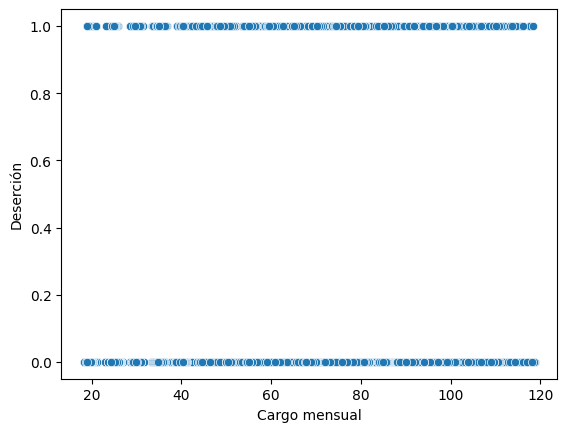

In [34]:
ax = sns.scatterplot(datos, x='Cargo mensual', y='Deserción')

In [35]:
px.box(datos, x='Deserción', y='Cargo mensual')

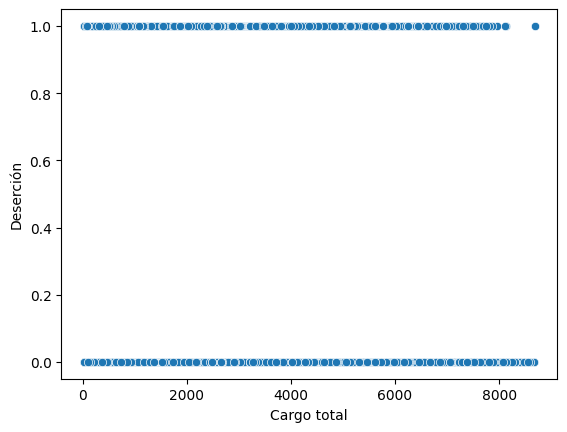

In [36]:
ax = sns.scatterplot(data=datos, x='Cargo total', y='Deserción')

In [37]:
ax = px.box(datos, x='Deserción', y='Cargo total')
ax.show()

In [38]:
ax = px.box(datos, x='Deserción', y='Antigüedad')
ax.show()

#Separación de Datos

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

#Modelo de referencia - Baseline

In [99]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7341232227488151

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



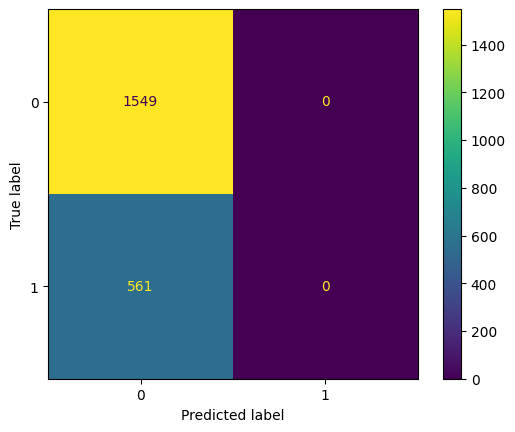

In [98]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred_dummy = dummy.predict(X_test)

print(classification_report(y_test,y_pred_dummy))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dummy);

# Árboles de Decisión

In [44]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [45]:
modelo_arbol.score(X_test, y_test)

0.7485779294653014

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

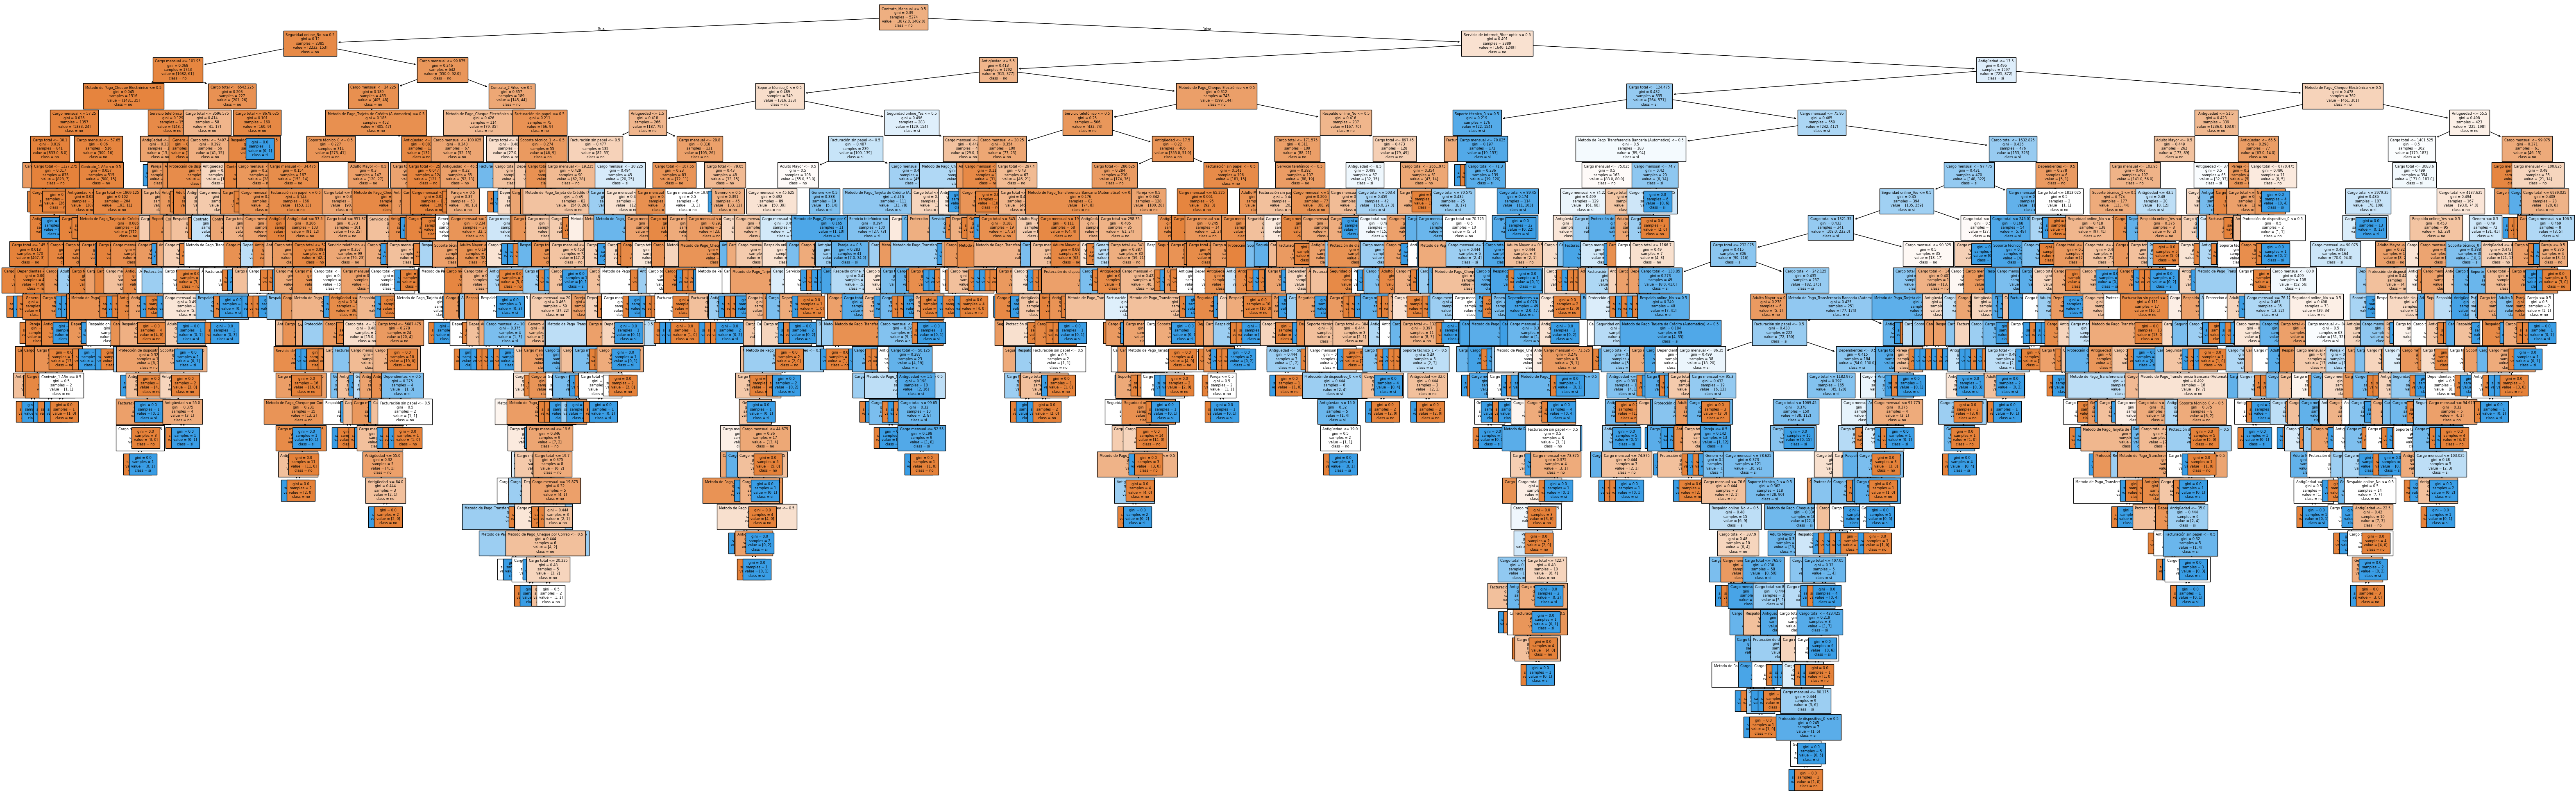

In [47]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, feature_names=X.columns, filled=True, class_names=['no','si'], fontsize = 6);

In [48]:
modelo_arbol.score(X_train, y_train)

0.9984831247629883

In [49]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [50]:
modelo_arbol.score(X_test, y_test)

0.7878270762229806

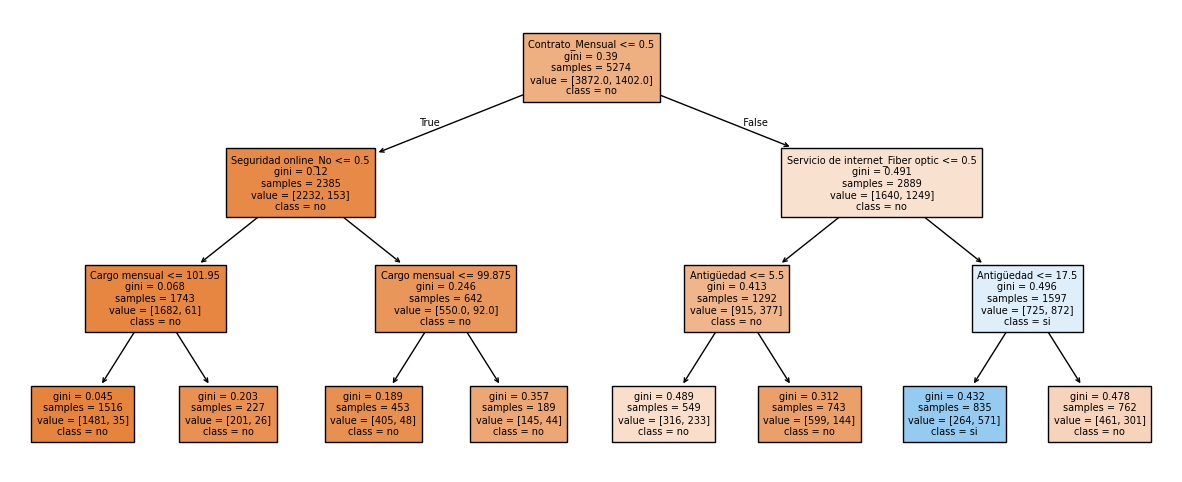

In [51]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, feature_names=X.columns, filled=True, class_names=['no','si'], fontsize = 7);

In [52]:
modelo_arbol.score(X_train, y_train)

0.7923777019340159

## Validando el modelo "Árbol de desición"

In [53]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify=y, random_state=5)

In [54]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.999729070712544
La exactitud del modelo con el conjunto de validación es: 0.7457351746547523


In [55]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.8946085071796261
La exactitud del modelo con el conjunto de validación es: 0.7660438667749797


## Evaluando el modelo "Árbol de desición"



In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import necessary for defining modelo

# Ensure 'modelo' is defined and fitted correctly before use
# This assumes X_train, y_train, X_test, y_test are already defined from the splits
modelo = DecisionTreeClassifier(max_depth=10) # Re-initialize with the chosen max_depth
modelo.fit(X_train, y_train) # Re-fit the model on the training data

y_previsto = modelo.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_previsto)
print(matriz_confusion)

[[1262  287]
 [ 252  309]]


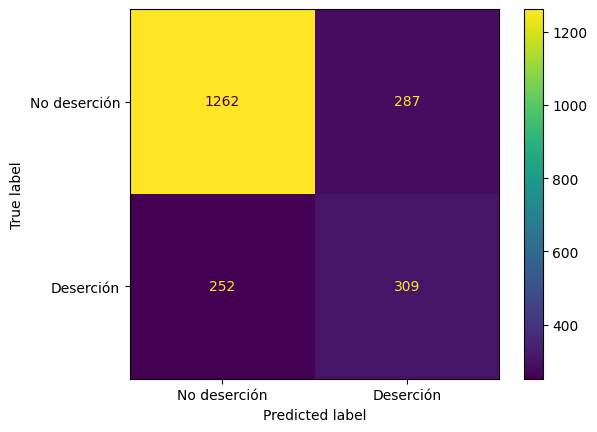

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

vizualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No deserción','Deserción'])
vizualizacion.plot()

## Exactitud, precisión y recall (sensibilidad).

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'La presición del modelo es: {precision_score(y_test, y_previsto)}')
print(f'La sensibilidad del modelo es: {recall_score(y_test, y_previsto)}')
print(f'La exactitud del modelo es: {accuracy_score(y_test, y_previsto)}')

La presición del modelo es: 0.5184563758389261
La sensibilidad del modelo es: 0.5508021390374331
La exactitud del modelo es: 0.7445497630331753


In [108]:
print(f'El F1 score del modelo es: {f1_score(y_test, y_previsto)}')

El F1 score del modelo es: 0.5341400172860847


##Informe de métricas

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.52      0.55      0.53       561

    accuracy                           0.74      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.74      0.75      2110



##Validación cruzada

### Usando KFold

In [61]:
from sklearn.model_selection import KFold, cross_validate

modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.02841306, 0.02561951, 0.02608871, 0.02504325, 0.02971077]),
 'score_time': array([0.00282693, 0.00429797, 0.00294495, 0.00369573, 0.00293422]),
 'test_score': array([0.76649746, 0.74517766, 0.77134146, 0.76321138, 0.76117886])}

In [62]:
cv_resultados['test_score']

array([0.76649746, 0.74517766, 0.77134146, 0.76321138, 0.76117886])

In [63]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío tipico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7614813668441254
El desvío tipico es de: 0.008846218074084837
El intervalo de confianza es: [0.7437889306959558,0.779173802992295]


### Validación cruzada con sensibilidad


In [68]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [69]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.02902508, 0.0256176 , 0.02605653, 0.02505279, 0.02575445]),
 'score_time': array([0.00520611, 0.00503683, 0.00488377, 0.00495744, 0.00479937]),
 'test_score': array([0.55648536, 0.56907895, 0.58024691, 0.56031128, 0.55471698])}

In [70]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.5452815434888479,0.5830542492215408]'

##Balanceo de Clases

###Oversampling

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [73]:
y_balanceada.value_counts(normalize=True)

Deserción
1    0.5
0    0.5
Name: proportion, dtype: float64

In [74]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [75]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.814637972181544,0.902559148158069]'

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1549
           1       0.45      0.68      0.54       561

    accuracy                           0.70      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.70      0.71      2110



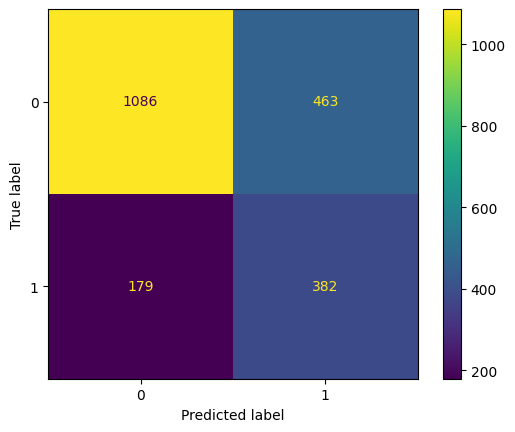

In [76]:
from imblearn.under_sampling import NearMiss
oversampling = NearMiss(version=3)
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### Pipeline para validación

In [77]:
from imblearn.pipeline import Pipeline as imbpipeline

In [78]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversampling', SMOTE()), ('árbol', modelo)])

In [79]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [80]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.5455677874255381,0.7113770226121913]'

### Undersampling

In [81]:
from imblearn.under_sampling import NearMiss

In [82]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('árbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [83]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6084658150245252,0.7386781702347536]'

### Probando el modelo

In [84]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1549
           1       0.45      0.69      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.69      0.71      2110



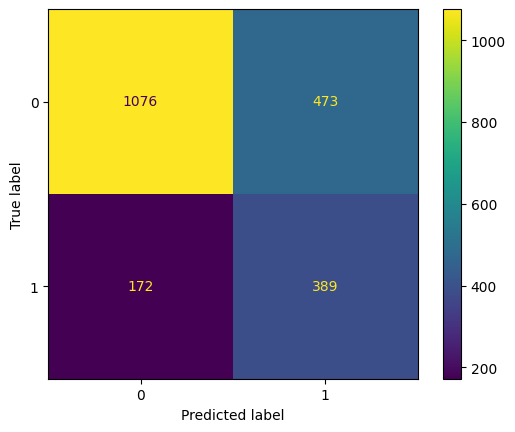

In [85]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### SMOTEENN

In [86]:
from imblearn.combine import SMOTEENN

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('árbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.690914858992782,0.757086076926027]'

#Normalización o Estandarización

In [87]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)

In [88]:
pd.DataFrame(X_train_normalizada)

0    1    2    3         4    5    6         7         8    9   ...  \
0     1.0  0.0  1.0  0.0  0.985915  0.0  1.0  0.285501  0.374960  1.0  ...   
1     1.0  0.0  0.0  0.0  0.000000  1.0  1.0  0.513702  0.005905  0.0  ...   
2     1.0  0.0  0.0  0.0  0.676056  1.0  1.0  0.558545  0.427920  1.0  ...   
3     0.0  0.0  0.0  0.0  0.084507  1.0  1.0  0.793722  0.080215  0.0  ...   
4     1.0  0.0  0.0  0.0  0.084507  1.0  1.0  0.753861  0.071022  0.0  ...   
...   ...  ...  ...  ...       ...  ...  ...       ...       ...  ...  ...   
3686  1.0  0.0  1.0  1.0  0.887324  0.0  0.0  0.313403  0.368806  1.0  ...   
3687  0.0  1.0  1.0  0.0  0.225352  1.0  1.0  0.817638  0.185310  0.0  ...   
3688  0.0  1.0  0.0  0.0  0.253521  1.0  1.0  0.772297  0.203274  0.0  ...   
3689  0.0  1.0  0.0  0.0  0.746479  1.0  0.0  0.466866  0.405739  1.0  ...   
3690  0.0  1.0  0.0  0.0  0.239437  1.0  1.0  0.398605  0.109324  1.0  ...   

       21   22   23   24   25   26   27   28   29   30  
0     0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
1     1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
2     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
3     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4     1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
3686  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
3687  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
3688  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
3689  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
3690  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  

[3691 rows x 31 columns]

#KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier()

In [90]:
X_test_normalizada = normalizacion.transform(X_test)
knn.score(X_test_normalizada, y_test)

0.7668246445497631

## Validando el modelo "KNN"

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Exactitud (Accuracy): 0.7668246445497631

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.87      0.84      1549
           1       0.57      0.50      0.53       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110


Matriz de Confusión:
 [[1340  209]
 [ 283  278]]


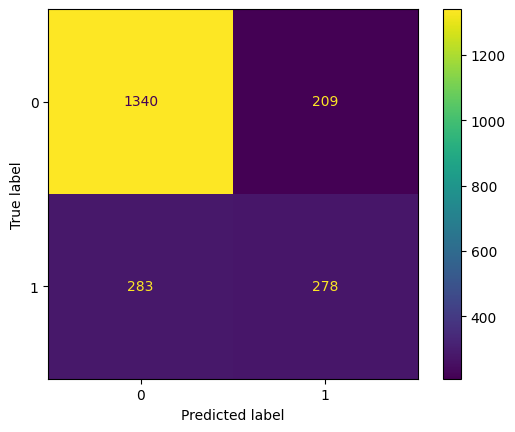

In [92]:
X_test_normalizada = normalizacion.transform(X_test)

y_pred = knn.predict(X_test_normalizada)

print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

Comparemos los informes de clasificación de los K-neighbors Más Próximos (KNN) y del Clasificador de Árbol de Decisión:

**Modelo de K-neighbors Más Próximos (KNN):**

* **Precisión:** 0,77
* **Clase 0 (No churn):** Precisión: 0,83,
Recuperación: 0,87, Puntuación F1: 0,85
**Clase 1 (Churn):** Precisión: 0,57, Recuperación: 0,50, Puntuación F1: 0,53

**Modelo de Clasificador de Árbol de Decisión:**

* **Precisión: 0,76**
* **Clase 0 (No churn):** Precisión: 0,81, Recuperación: 0,87, Puntuación F1: 0,84
* **Clase 1 (Churn):** Precisión: 0,51, Recuperación: 0,41, Puntuación F1: 0,45


**Comparación:**

**Precisión general:** Ambos modelos Tienen una precisión general similar, con KNN ligeramente superior, con 0,77, en comparación con el 0,76 del Árbol de Decisión.

**Rendimiento en la categoría "No Churn" (Clase 0):** Ambos modelos ofrecen un excelente rendimiento en la categoría "Sin abandono", con alta precisión, recuperación y puntuaciones F1. ***KNN tiene una precisión ligeramente superior (0,83 frente a 0,81) para esta categoría.***

**Rendimiento en la categoría "Churn" (Clase 1):** Aquí es donde los modelos muestran una diferencia más notable.
1. **Precisión (Churn):** KNN tiene una precisión superior, de 0,58, para el abandono, lo que significa que, al predecirlo, acierta el 58 % de las veces. El Árbol de Decisión tiene una precisión inferior, de 0,51.
2. **Recall (Churn):** KNN también muestra una mejor recuperación, de 0,51, para el abandono, identificando al 51 % de los clientes que realmente abandonan. La recuperación del Árbol de Decisión es inferior, de 0,41.
3. **Puntuación F1 (Churn):** En consecuencia, KNN presenta una mejor puntuación F1 (0,54) para la clase de abandono en comparación con el Árbol de Decisión (0,45), lo que indica un mejor equilibrio entre precisión y recuperación para identificar clientes que abandonan.

**Conclusión:**

Basándose en estas métricas, el modelo K-neighbors Más Cercanos (KNN) generalmente muestra un rendimiento ligeramente mejor, especialmente en la identificación de la clase "Churn", que suele ser la clase más crítica en escenarios de predicción de deserción. Presenta mayor precisión, recuperación y puntuación F1 para la clase positiva (churn) en comparación con el Árbol de Decisión. Si el objetivo es maximizar la identificación de clientes que abandonan, KNN parece ser la mejor opción entre estos dos modelos con sus configuraciones actuales.

De igual manera podemos realizar algunas mejoras al modelo para tener mejores resultado, acontinuación utilizaremos el ajuste de hiperparámetros.

**Ajuste de hiperparámetros (n_neighborns):** El número de vecinos (n_neighborns) es el hiperparámetro más crítico para KNN. Un valor óptimo puede mejorar significativamente el rendimiento. Encontramos un mejor valor usando GridSearchCV.

Mejor n_neighbors: 29
Mejor puntuación de recall en validación cruzada: 0.5484

--- Evaluación del Modelo KNN Optimizado ---
Exactitud (Accuracy): 0.7848341232227488

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.78      0.78      2110


Matriz de Confusión:
 [[1362  187]
 [ 267  294]]


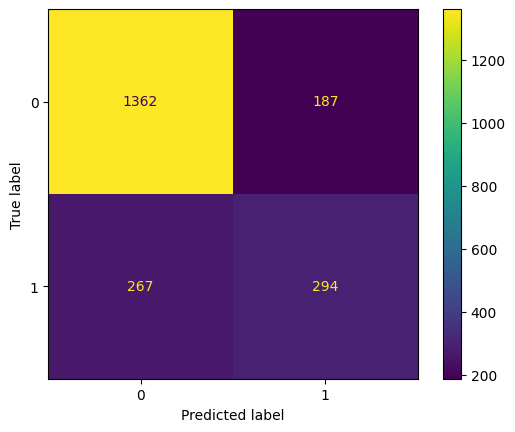

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train_normalizada = normalizacion.fit_transform(X_train)
X_test_normalizada = normalizacion.transform(X_test)

param_grid = {'n_neighbors': range(1, 31)} # Test k from 1 to 30

knn_base = KNeighborsClassifier()

grid_search = GridSearchCV(knn_base, param_grid, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(X_train_normalizada, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Mejor n_neighbors: {best_n_neighbors}")
print(f"Mejor puntuación de recall en validación cruzada: {best_score:.4f}")

knn_optimized = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_optimized.fit(X_train_normalizada, y_train)

y_pred_optimized_knn = knn_optimized.predict(X_test_normalizada)

print("\n--- Evaluación del Modelo KNN Optimizado ---")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_optimized_knn))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred_optimized_knn))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_optimized_knn))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_optimized_knn);

**Modelo de K-neighbors Más Próximos (KNN) optimizado:**

* **Precisión:** 0,79
* **Clase 0 (No churn):** Precisión: 0,84,
Recuperación: 0,88, Puntuación F1: 0,86
**Clase 1 (Churn):** Precisión: 0,62, Recuperación: 0,52, Puntuación F1: 0,57



#Regresión Logística (con normalización)

In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

model = make_pipeline(
    StandardScaler(), LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
)

# 3. Entrenar el modelo
model.fit(X_train, y_train)

# 4. Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f"Precisión del modelo (con regularización L2): {accuracy:.2f}")

# Acceder a los coeficientes
coefs = model.named_steps['logisticregression'].coef_
print("Coeficientes:", coefs)


Precisión del modelo (con regularización L2): 0.81
Coeficientes: [[-0.04386049  0.08629828 -0.00226087 -0.05414433 -1.36445855 -0.35193881
   0.19638487  0.60603282  0.65935033 -0.06620846  0.05116274  0.01504806
   0.08829523  0.01504806 -0.11124085  0.06517748  0.01504806 -0.08146667
   0.0083517  -0.02169407  0.01504806  0.11844069 -0.14518979  0.01504806
  -0.06804147 -0.28419593  0.29959657  0.14270879 -0.0686804  -0.12610053
   0.03258249]]


--- Evaluación del Modelo de Regresión Logística ---
Precisión (Accuracy): 0.8057
Precisión: 0.6563
Sensibilidad (Recall): 0.5651
F1-Score: 0.6073

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110


Matriz de Confusión:


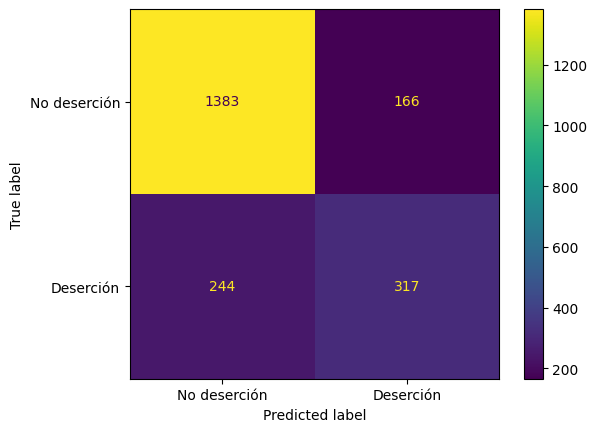

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_log = model.predict(X_test)

print("--- Evaluación del Modelo de Regresión Logística ---")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred_log):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_log):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.4f}")

print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred_log))

print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm, display_labels=['No deserción', 'Deserción']).plot();

#Evaluación de los modelos

In [110]:
def evaluar_modelo(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


In [113]:
resultados = {
    "Baseline (Dummy)": evaluar_modelo(y_test, y_pred_dummy),
    "Árbol de Decisión": evaluar_modelo(y_test, y_previsto),
    "KNN": evaluar_modelo(y_test, y_pred),
    "KNN optimizado": evaluar_modelo(y_test, y_pred_optimized_knn),
    "Regresión Logística": evaluar_modelo(y_test, y_pred_log)
}

resultados_df = pd.DataFrame(resultados).T
resultados_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy  Precision    Recall  F1-score
Baseline (Dummy)     0.734123   0.000000  0.000000  0.000000
Árbol de Decisión    0.744550   0.518456  0.550802  0.534140
KNN                  0.766825   0.570842  0.495544  0.530534
KNN optimizado       0.784834   0.611227  0.524064  0.564299
Regresión Logística  0.805687   0.656315  0.565062  0.607280

# Extraer Coeficientes y Nombres de Características


Obtener los coeficientes del modelo de Regresión Logística y los nombres de las características correspondientes. Asegurarse de que los coeficientes estén asociados correctamente con sus características.


In [114]:
coeficientes = model.named_steps['logisticregression'].coef_[0]
nombres_caracteristicas = X_train.columns

df_coeficientes = pd.DataFrame({
    'Feature': nombres_caracteristicas,
    'Coefficient': coeficientes
})

print(df_coeficientes.sort_values(by='Coefficient', ascending=False))

                                              Feature  Coefficient
8                                         Cargo total     0.659350
7                                       Cargo mensual     0.606033
26                                   Contrato_Mensual     0.299597
6                               Facturación sin papel     0.196385
27                  Metodo de Pago_Cheque Electrónico     0.142709
21                                  Soporte técnico_0     0.118441
12                                Seguridad online_No     0.088295
1                                        Adulto Mayor     0.086298
15                                 Respaldo online_No     0.065177
10                   Servicio de internet_Fiber optic     0.051163
30  Metodo de Pago_Transferencia Bancaria (Automat...     0.032582
11                            Servicio de internet_No     0.015048
20      Protección de dispositivo_No internet service     0.015048
23                Soporte técnico_No internet service     0.01

In [115]:
import plotly.express as px

fig = px.bar(df_coeficientes.sort_values(by='Coefficient', ascending=False),
             x='Feature', y='Coefficient',
             title='Impacto de las Características en la Deserción (Coeficientes de Regresión Logística)',
             labels={'Coefficient': 'Valor del Coeficiente', 'Feature': 'Característica'},
             color='Coefficient', color_continuous_scale='RdBu_r')

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

# Interpretación de los Coeficientes

El gráfico de barras muestra la magnitud y dirección del impacto de cada característica en la probabilidad de deserción del cliente, según el modelo de Regresión Logística. Aquí se destacan algunas observaciones clave:

*   **Coeficientes Positivos (aumentan la probabilidad de deserción):**
    *   **Cargo total, Cargo mensual:** Los cargos asociados a los servicios tienen una influencia positiva significativa en la deserción. Esto sugiere que a mayor costo, mayor es la probabilidad de que un cliente abandone.
    *   **Contrato_Mensual:** Los clientes con contratos mensuales tienen una mayor propensión a la deserción, lo cual es coherente con la naturaleza menos vinculante de estos contratos.
    *   **Metodo de Pago_Cheque Electrónico:** Este método de pago también muestra una correlación positiva con la deserción. Podría indicar una mayor comodidad para cancelar el servicio o una menor lealtad por parte de estos clientes.
    *   **Servicio de internet_Fiber optic:** Tener servicio de fibra óptica, a pesar de ser un servicio de alta velocidad, se asocia con una mayor probabilidad de deserción. Esto podría deberse a expectativas no cumplidas o a la existencia de alternativas competitivas en el mercado.
    *   **Seguridad online_No, Respaldo online_No, Soporte técnico_0, Protección de dispositivo_0:** La ausencia de servicios adicionales como seguridad online, respaldo online, soporte técnico o protección de dispositivo está asociada con una mayor probabilidad de deserción. Esto resalta la importancia de los servicios de valor añadido para retener a los clientes.

*   **Coeficientes Negativos (disminuyen la probabilidad de deserción):**
    *   **Antigüedad:** Es la característica con el coeficiente negativo más grande en magnitud. Esto indica que cuanto más tiempo lleva un cliente con la compañía, menor es la probabilidad de que deserte, lo que subraya la importancia de la lealtad a largo plazo.
    *   **Servicio telefónico:** Tener servicio telefónico se asocia con una menor probabilidad de deserción. Esto podría implicar que los clientes que utilizan este servicio están más comprometidos con la compañía.
    *   **Contrato_2 Años, Contrato_1 Año:** Los contratos a largo plazo (1 o 2 años) reducen significativamente la probabilidad de deserción, lo que es esperable ya que estos contratos implican un compromiso mayor por parte del cliente.
    *   **Servicio de internet_DSL:** Curiosamente, tener servicio de internet DSL tiene un coeficiente negativo, lo que podría sugerir que estos clientes son, en promedio, más estables o tienen menos opciones alternativas.
    *   **Metodo de Pago_Tarjeta de Crédito (Automatico), Metodo de Pago_Cheque por Correo:** Algunos métodos de pago automáticos o tradicionales están asociados con una menor probabilidad de deserción.
    *   **Soporte técnico_1, Seguridad online_Yes, Respaldo online_Yes, Protección de dispositivo_1:** La presencia de estos servicios adicionales (cuando el valor es 'Sí' o '1') tiene un coeficiente negativo, lo que confirma que estos servicios ayudan a retener a los clientes.

#Conclusión

Con base en los datos previamente depurados y estructurados en la Fase 1 del proyecto Telecom X, se planteó como objetivo el desarrollo de un modelo predictivo capaz de identificar a los clientes con mayor riesgo de cancelación del servicio (churn).

Para ello, se llevó a cabo un proceso integral que incluyó la preparación y transformación de los datos, el análisis exploratorio, el entrenamiento de distintos modelos de machine learning y su posterior evaluación comparativa. La valoración del desempeño se realizó mediante métricas clave como precisión (precision), recall y F1-score, priorizando el equilibrio entre la correcta identificación de clientes en riesgo y la minimización de falsos positivos.

Se evaluaron tres modelos diferentes. La Regresión Logística presentó el mejor desempeño global, destacándose por alcanzar el mayor F1-score y mantener un balance adecuado entre precisión y capacidad de detección de clientes que efectivamente cancelan el servicio. El Árbol de Decisión mostró un desempeño competitivo y aportó ventajas en términos de interpretabilidad. El modelo KNN presentó buenos resultados, mejorados con la optimización del modelo, pero aún así quedando por debajo de la Regresión Logística. Por su parte, el modelo de referencia (baseline) evidenció las limitaciones de utilizar únicamente métricas como la accuracy en problemas de churn, donde el desbalance de clases puede distorsionar la evaluación del rendimiento real.

El análisis de la importancia de variables permitió identificar factores determinantes asociados a la cancelación. En particular, se observó que los clientes con menor antigüedad, contratos de corto plazo, servicio de internet de fibra óptica y ciertas configuraciones específicas presentan una mayor probabilidad de churn. En contraste, una mayor permanencia, contratos de mayor duración y una mayor vinculación mediante múltiples servicios se asocian con una menor propensión a la cancelación.

En conjunto, los resultados confirman que la cancelación de clientes es un fenómeno multifactorial que responde a la interacción de variables contractuales, económicas y de relación con el servicio. En este contexto, la implementación de modelos predictivos constituye una herramienta estratégica para anticipar comportamientos de riesgo y facilitar la toma de decisiones preventivas basadas en datos, contribuyendo así a la optimización de estrategias de retención y a la mejora del desempeño comercial de la organización.

#Recomendaciones

En base a los resultados obtenidos se pueden realizar las siguientes recomendaciones:

1. Recomendamos ofrecer incentivos, ya sean promociones o mejoras en el servicio, para que los nuevos clientes desidan obtener un contrato de mayor duración en la compañia.
2. Ofrecer a los clientes obtener los servicios adicionales como son el soporte, seguridad online, respaldo y protección de dispositivo, de esa manera el cliente obtiene un mejor servicio y le da mayor valor.
3. Dar seguimiento a los clientes de menor antigüedad para poder implementar estrategias de retención temprana.
4. Incentivar a que el cliente escoja un método de pago automático en lugar de escoger pago con cheque electrónico ya que este muestra una mayor facilidad de cancelación por el cliente.
5. Analizar cual es el problema con el cual se encuentran los clientes al contratar servicio de internet con Fibra óptica, ya que se ha observado que este servicio de internet ha presentado un alto porcentaje de cancelación.

Utilizando nuestro modelo de predicción y tomando en cuenta las recomendaciones, Telecom X podrá mejorar su estrategia de retención y así disminuir la cancelación del servicio.